=== MERGED TRAINING LOGS ===
V1 epochs: 1-50
V2 epochs: 51-110
Total epochs: 110

=== SUMMARY ===
V1 Best val accuracy: 80.33%
Final Best val accuracy: 81.53%
Final Best val loss: 1.5437


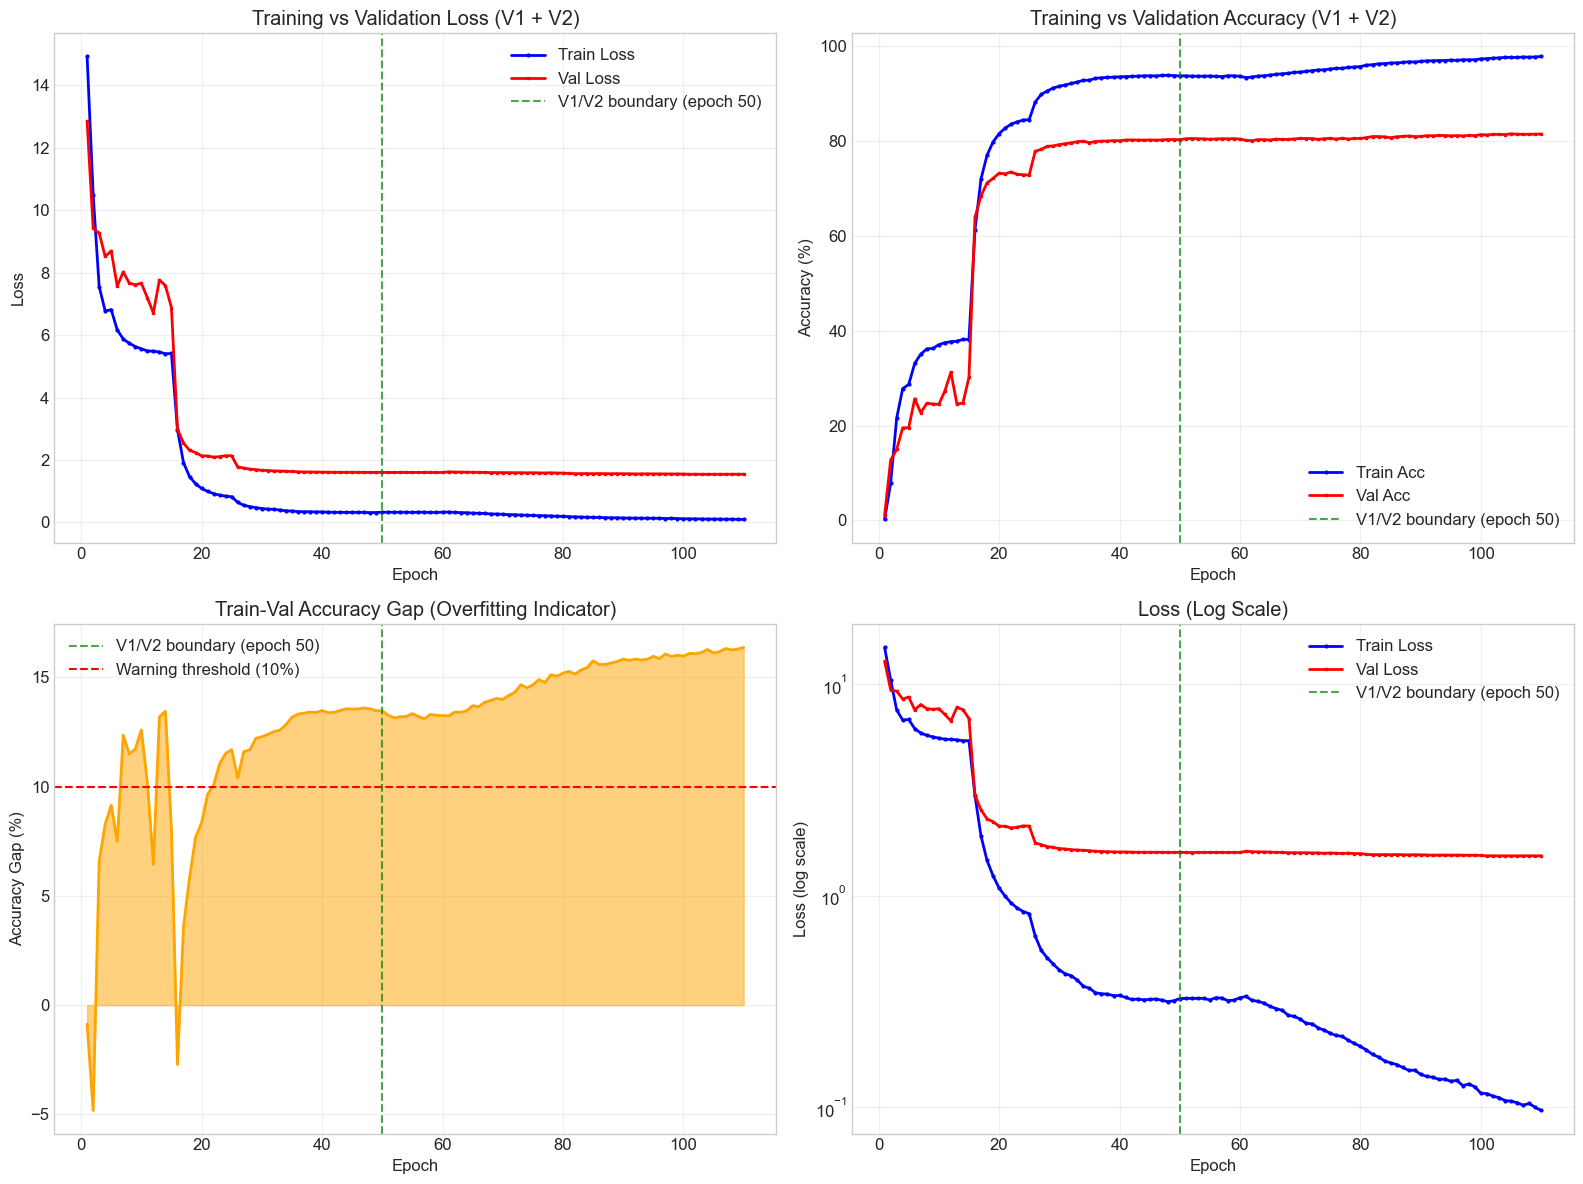


Da luu bieu do vao: d:\HCMUTE_project\DIP\FaceRecognition\scripts\..\logs\arcface\training_visualization_merged.png

=== PHAN TICH KET QUA TRAINING ===

Final Train Accuracy: 97.84%
Final Val Accuracy: 81.48%
Accuracy Gap: 16.37%

Final Train Loss: 0.0965
Final Val Loss: 1.5449

Best Epoch: 105
Best Val Accuracy: 81.53%

[CANH BAO] Mo hinh co dau hieu overfit nghiem trong (gap > 15%)


In [13]:
# Visualize ArcFace Training Logs

import sys
import os
# Thêm thư mục gốc project vào Python path
sys.path.insert(0, os.path.dirname(os.getcwd()))
# Import module
from scripts import visualize_logs_merged
# Gọi hàm main
visualize_logs_merged.main()
"""
Script trực quan hoá kết quả training ArcFace từ file logs_combined.json
"""
import json
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12



Loading logs...
Total epochs: 110

=== SUMMARY ===
Best val accuracy: 81.53%
Best val loss: 1.5419
Total epochs: 110
Number of classes: 9343
Final train accuracy: 97.84%
Final val accuracy: 81.48%

Generating plots...


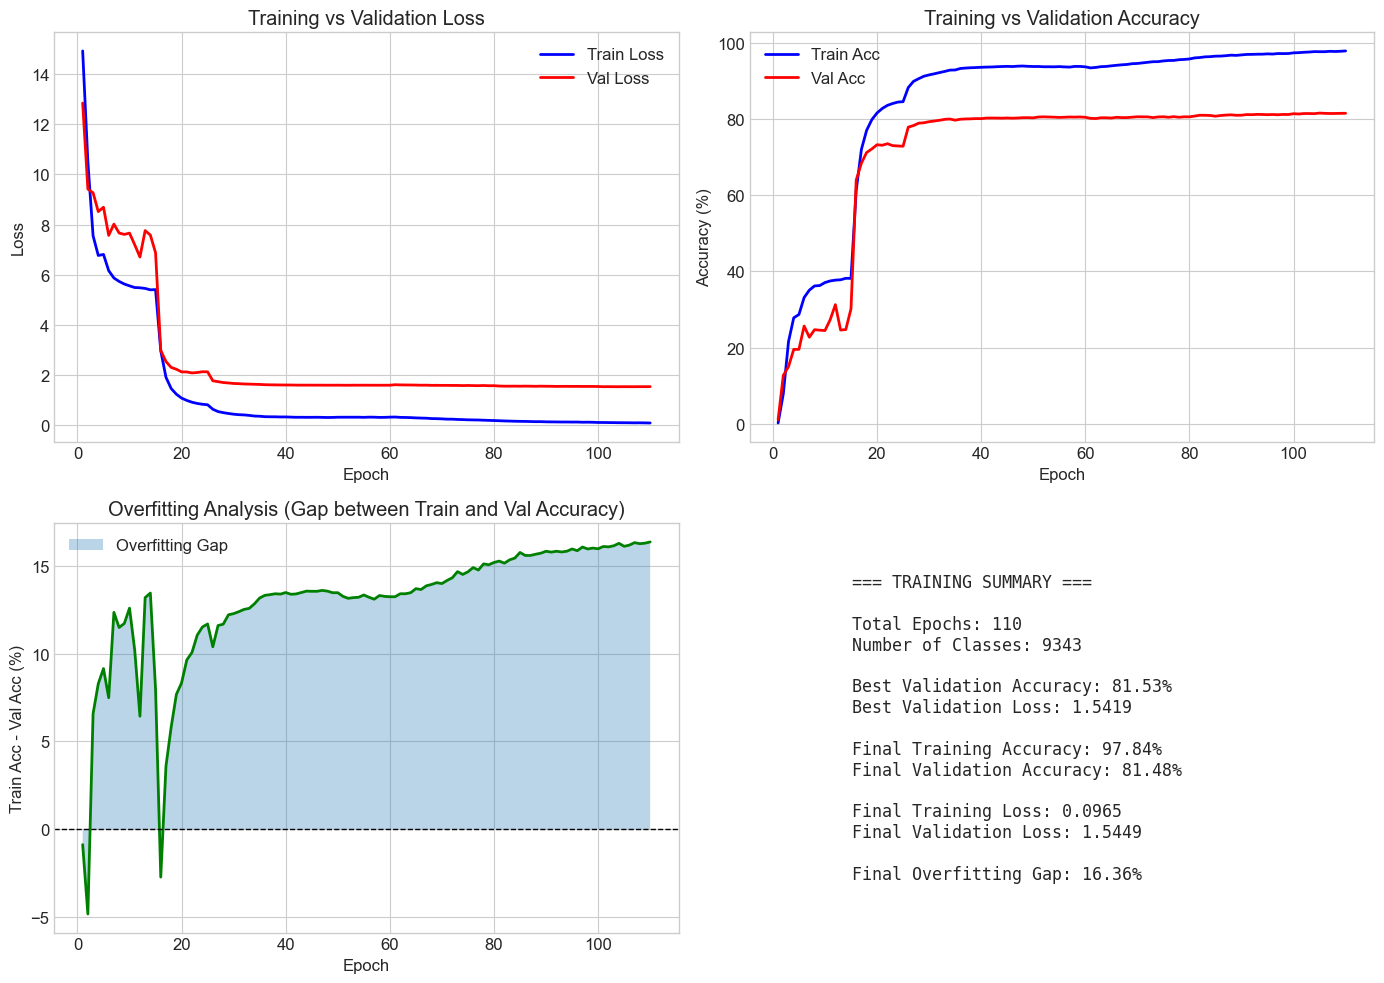

Done! Saved to ../logs/arcface/training_curves.png


In [14]:
def load_logs(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)
    history = data['history']
    epochs = history['epoch']
    train_loss = history['train_loss']
    train_acc = history['train_acc']
    val_loss = history['val_loss']
    val_acc = history['val_acc']
    summary = {
        'best_val_acc': data.get('best_val_acc'),
        'best_val_loss': data.get('best_val_loss'),
        'total_epochs': data.get('total_epochs'),
        'num_classes': data.get('num_classes'),
        'config': data.get('config')
    }
    return epochs, train_loss, train_acc, val_loss, val_acc, summary


def plot_training_curves(epochs, train_loss, train_acc, val_loss, val_acc, summary):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Loss curves
    ax1 = axes[0, 0]
    ax1.plot(epochs, train_loss, 'b-', label='Train Loss', linewidth=2)
    ax1.plot(epochs, val_loss, 'r-', label='Val Loss', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training vs Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # 2. Accuracy curves
    ax2 = axes[0, 1]
    ax2.plot(epochs, train_acc, 'b-', label='Train Acc', linewidth=2)
    ax2.plot(epochs, val_acc, 'r-', label='Val Acc', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training vs Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    # 3. Train-Val Accuracy Gap (Overfitting indicator)
    ax3 = axes[1, 0]
    gap = np.array(train_acc) - np.array(val_acc)
    ax3.fill_between(epochs, 0, gap, alpha=0.3, label='Overfitting Gap')
    ax3.plot(epochs, gap, 'g-', linewidth=2)
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Train Acc - Val Acc (%)')
    ax3.set_title('Overfitting Analysis (Gap between Train and Val Accuracy)')
    ax3.legend()
    ax3.grid(True)
    
    # 4. Summary text
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    summary_text = f"""
    === TRAINING SUMMARY ===
    
    Total Epochs: {summary.get('total_epochs', 'N/A')}
    Number of Classes: {summary.get('num_classes', 'N/A')}
    
    Best Validation Accuracy: {summary.get('best_val_acc', 'N/A'):.2f}%
    Best Validation Loss: {summary.get('best_val_loss', 'N/A'):.4f}
    
    Final Training Accuracy: {train_acc[-1]:.2f}%
    Final Validation Accuracy: {val_acc[-1]:.2f}%
    
    Final Training Loss: {train_loss[-1]:.4f}
    Final Validation Loss: {val_loss[-1]:.4f}
    
    Final Overfitting Gap: {train_acc[-1] - val_acc[-1]:.2f}%
    """
    
    ax4.text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
             fontfamily='monospace', transform=ax4.transAxes)
    
    plt.tight_layout()
    # plt.savefig('../logs/arcface/training_curves.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return fig

logs_path = '../logs/arcface/logs_combined.json'
    
print("Loading logs...")
epochs, train_loss, train_acc, val_loss, val_acc, summary = load_logs(logs_path)
    
print(f"Total epochs: {len(epochs)}")
print(f"\n=== SUMMARY ===")
print(f"Best val accuracy: {summary.get('best_val_acc', 'N/A')}%")
print(f"Best val loss: {summary.get('best_val_loss', 'N/A')}")
print(f"Total epochs: {summary.get('total_epochs', 'N/A')}")
print(f"Number of classes: {summary.get('num_classes', 'N/A')}")
print(f"Final train accuracy: {train_acc[-1]}%")
print(f"Final val accuracy: {val_acc[-1]}%")
    
print("\nGenerating plots...")
plot_training_curves(epochs, train_loss, train_acc, val_loss, val_acc, summary)
print("Done! Saved to ../logs/arcface/training_curves.png")



In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

## 1. Load Evaluation Report

In [4]:
report_path = '../logs/arcface/evaluation_report.json'

with open(report_path, 'r') as f:
    report = json.load(f)

print("=" * 70)
print("EVALUATION REPORT SUMMARY")
print("=" * 70)
print(f"\nTimestamp: {report['timestamp']}")
print(f"Method: {report['method']}")
print(f"\nModel Info:")
print(f"  - Classes: {report['model']['num_classes']:,}")
print(f"  - Epochs trained: {report['model']['epochs']}")
print(f"  - Training val accuracy: {report['model']['training_val_acc']:.2f}%")
print(f"\nMetrics:")
print(f"  - Top-1 Accuracy: {report['metrics']['top1_accuracy']:.2f}%")
print(f"  - Top-5 Accuracy: {report['metrics']['top5_accuracy']:.2f}%")
print(f"  - AUC: {report['metrics']['auc']:.4f}")
print(f"\nPerformance:")
print(f"  - Avg Latency: {report['performance']['avg_latency_ms']:.2f} ms")
print(f"  - Max Throughput: {report['performance']['max_throughput']:.2f} images/sec")
print("=" * 70)

EVALUATION REPORT SUMMARY

Timestamp: 2025-12-14T03:51:10.099121
Method: embedding-based (cosine similarity)

Model Info:
  - Classes: 9,343
  - Epochs trained: 105
  - Training val accuracy: 81.53%

Metrics:
  - Top-1 Accuracy: 88.14%
  - Top-5 Accuracy: 94.11%
  - AUC: 0.9970

Performance:
  - Avg Latency: 7.89 ms
  - Max Throughput: 2361.39 images/sec


## 2. Trực quan hóa Metrics

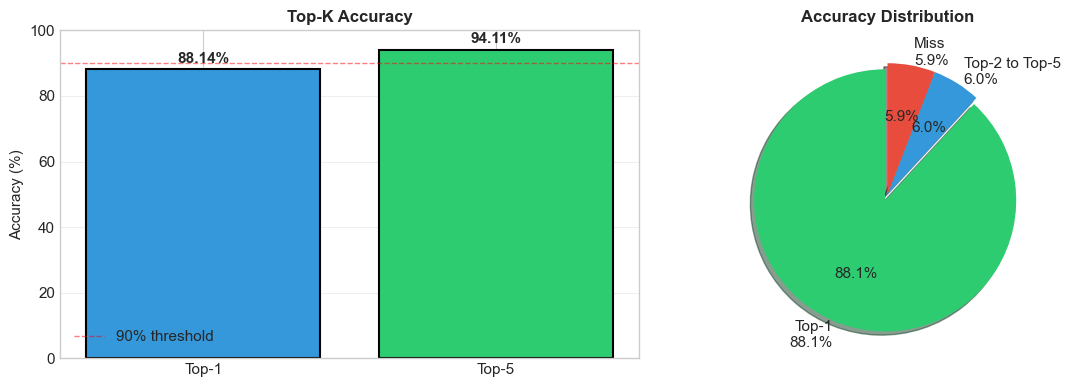

In [17]:
# Biểu đồ Top-K Accuracy
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Top-K Accuracy
ax1 = axes[0]
accuracies = [
    report['metrics']['top1_accuracy'],
    report['metrics']['top5_accuracy']
]
labels = ['Top-1', 'Top-5']
colors = ['#3498db', '#2ecc71']
bars = ax1.bar(labels, accuracies, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Top-K Accuracy', fontweight='bold', fontsize=12)
ax1.set_ylim([0, 100])
ax1.axhline(y=90, color='red', linestyle='--', linewidth=1, alpha=0.5, label='90% threshold')
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Accuracy Breakdown (Pie Chart)
ax2 = axes[1]
top1_acc = report['metrics']['top1_accuracy']
top5_improvement = report['metrics']['top5_accuracy'] - top1_acc
remaining = 100 - report['metrics']['top5_accuracy']
sizes = [top1_acc, top5_improvement, remaining]
labels_pie = [f'Top-1\n{top1_acc:.1f}%', 
              f'Top-2 to Top-5\n{top5_improvement:.1f}%',
              f'Miss\n{remaining:.1f}%']
colors_pie = ['#2ecc71', '#3498db', '#e74c3c']
explode = (0.05, 0, 0)
ax2.pie(sizes, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)
ax2.set_title('Accuracy Distribution', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## 3. Training vs Test Performance

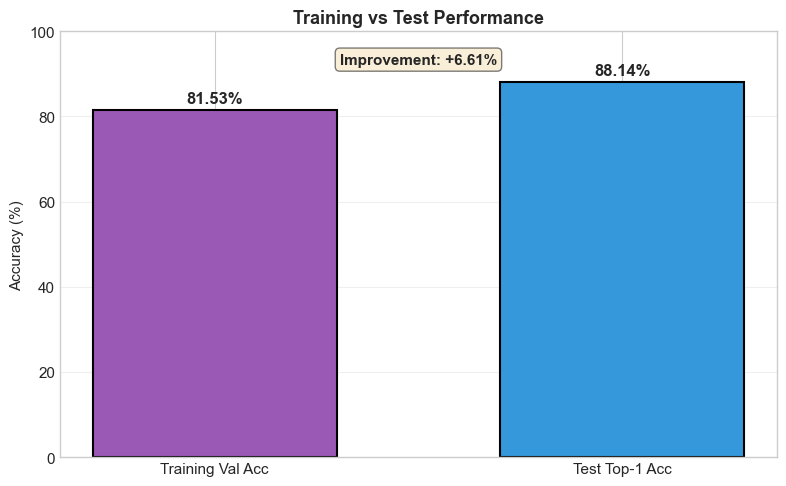

In [18]:
# Training vs Test Accuracy
fig, ax = plt.subplots(figsize=(8, 5))

train_val_acc = report['model']['training_val_acc']
test_acc = report['metrics']['top1_accuracy']
accuracies_comparison = [train_val_acc, test_acc]
labels_comparison = ['Training Val Acc', 'Test Top-1 Acc']
colors_comparison = ['#9b59b6', '#3498db']
bars = ax.bar(labels_comparison, accuracies_comparison, color=colors_comparison, 
               edgecolor='black', linewidth=1.5, width=0.6)
ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.set_title('Training vs Test Performance', fontweight='bold', fontsize=13)
ax.set_ylim([0, 100])
for bar, acc in zip(bars, accuracies_comparison):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)
gap = test_acc - train_val_acc
ax.text(0.5, 0.95, f'Improvement: {gap:+.2f}%', 
         transform=ax.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=11, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. AUC và Performance Metrics

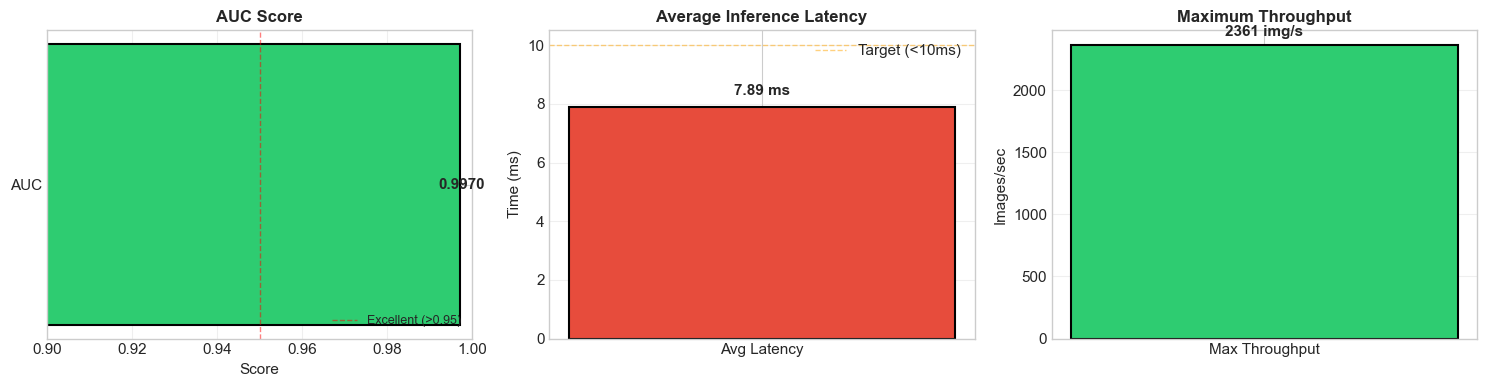

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. AUC Score
ax1 = axes[0]
auc_value = report['metrics']['auc']
colors_auc = ['#2ecc71' if auc_value >= 0.95 else '#f39c12' if auc_value >= 0.90 else '#e74c3c']
bars = ax1.barh(['AUC'], [auc_value], color=colors_auc, edgecolor='black', linewidth=1.5)
ax1.set_xlim([0.9, 1.0])
ax1.set_xlabel('Score')
ax1.set_title('AUC Score', fontweight='bold', fontsize=12)
ax1.axvline(x=0.95, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Excellent (>0.95)')
ax1.text(auc_value - 0.005, 0, f'{auc_value:.4f}', va='center', fontweight='bold', fontsize=11)
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(axis='x', alpha=0.3)

# 2. Latency
ax2 = axes[1]
latency = report['performance']['avg_latency_ms']
ax2.bar(['Avg Latency'], [latency], color='#e74c3c', edgecolor='black', linewidth=1.5, width=0.5)
ax2.set_ylabel('Time (ms)')
ax2.set_title('Average Inference Latency', fontweight='bold', fontsize=12)
ax2.text(0, latency + 0.3, f'{latency:.2f} ms', ha='center', va='bottom', 
         fontweight='bold', fontsize=11)
ax2.axhline(y=10, color='orange', linestyle='--', linewidth=1, alpha=0.5, 
            label='Target (<10ms)')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Throughput
ax3 = axes[2]
throughput = report['performance']['max_throughput']
ax3.bar(['Max Throughput'], [throughput], color='#2ecc71', edgecolor='black', linewidth=1.5, width=0.5)
ax3.set_ylabel('Images/sec')
ax3.set_title('Maximum Throughput', fontweight='bold', fontsize=12)
ax3.text(0, throughput + 50, f'{throughput:.0f} img/s', ha='center', va='bottom', 
         fontweight='bold', fontsize=11)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. AUC Gauge và Summary


✓ Đã lưu visualization vào: ../logs/arcface/evaluation_visualization.png


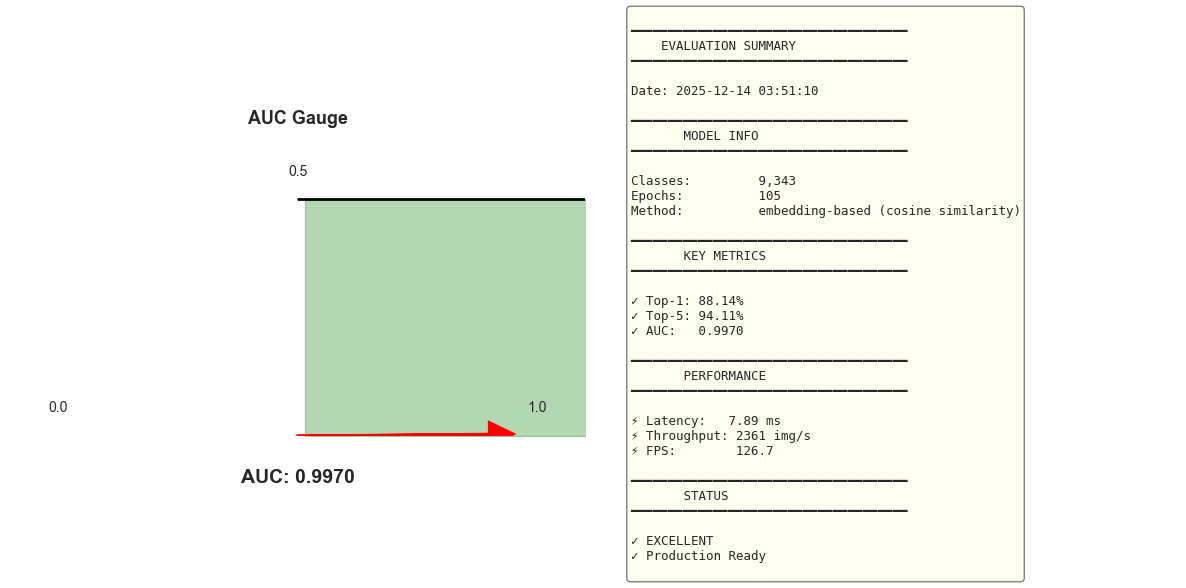

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. AUC Gauge
ax1 = axes[0]
auc_val = report['metrics']['auc']
theta = np.linspace(np.pi, 0, 100)
r = np.ones_like(theta)
ax1.plot(theta, r, 'k-', linewidth=2)
ax1.fill_between(theta[:int(auc_val*100)], 0, 1, alpha=0.3, color='green')
angle = np.pi * (1 - auc_val)
ax1.arrow(0, 0, np.cos(angle)*0.8, np.sin(angle)*0.8, 
          head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2)
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([0, 1.2])
ax1.axis('off')
ax1.text(0, -0.2, f'AUC: {auc_val:.4f}', ha='center', fontsize=14, fontweight='bold')
ax1.text(-1, 0.1, '0.0', ha='center', fontsize=10)
ax1.text(1, 0.1, '1.0', ha='center', fontsize=10)
ax1.text(0, 1.1, '0.5', ha='center', fontsize=10)
ax1.set_title('AUC Gauge', fontweight='bold', fontsize=13, pad=20)

# 2. Summary Statistics
ax2 = axes[1]
ax2.axis('off')
timestamp = datetime.fromisoformat(report['timestamp'].replace('Z', '+00:00'))
latency = report['performance']['avg_latency_ms']
top1_acc = report['metrics']['top1_accuracy']
summary = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    EVALUATION SUMMARY
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Date: {timestamp.strftime('%Y-%m-%d %H:%M:%S')}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       MODEL INFO
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Classes:         {report['model']['num_classes']:,}
Epochs:          {report['model']['epochs']}
Method:          {report['method']}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       KEY METRICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

 Top-1: {report['metrics']['top1_accuracy']:.2f}%
 Top-5: {report['metrics']['top5_accuracy']:.2f}%
 AUC:   {report['metrics']['auc']:.4f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       PERFORMANCE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

 Latency:   {report['performance']['avg_latency_ms']:.2f} ms
 Throughput: {report['performance']['max_throughput']:.0f} img/s
 FPS:        {1000/report['performance']['avg_latency_ms']:.1f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
       STATUS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

{' EXCELLENT' if auc_val >= 0.99 and top1_acc >= 85 else ' GOOD' if auc_val >= 0.95 else '⚠ NEEDS IMPROVEMENT'}
{' Production Ready' if latency < 10 else '⚠ Needs Optimization'}
"""
ax2.text(0.05, 0.5, summary, fontsize=9, verticalalignment='center',
         fontfamily='monospace', transform=ax2.transAxes,
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.savefig('../logs/arcface/evaluation_visualization.png', dpi=150, bbox_inches='tight')
print("\n Đã lưu visualization vào: ../logs/arcface/evaluation_visualization.png")
plt.show()

## 3. Phân tích chi tiết

In [ ]:
print("=" * 70)
print("PHÂN TÍCH CHI TIẾT")
print("=" * 70)

# Accuracy Analysis
top1 = report['metrics']['top1_accuracy']
top5 = report['metrics']['top5_accuracy']
improvement = top5 - top1

print("\n1. ACCURACY ANALYSIS:")
print(f"   - Top-1 Accuracy: {top1:.2f}%")
print(f"   - Top-5 Accuracy: {top5:.2f}%")
print(f"   - Top-5 Improvement: {improvement:.2f}%")
print(f"   - Error Rate (Top-1): {100-top1:.2f}%")
print(f"   - Error Rate (Top-5): {100-top5:.2f}%")

if top1 >= 90:
    print("   Status: EXCELLENT - Model có độ chính xác rất cao")
elif top1 >= 85:
    print("   Status: GOOD - Model hoạt động tốt")
elif top1 >= 80:
    print("   Status: ACCEPTABLE - Model cần cải thiện")
else:
    print("    Status: POOR - Model cần training lại")

# AUC Analysis
auc = report['metrics']['auc']
print("\n2. AUC ANALYSIS:")
print(f"   - AUC Score: {auc:.4f}")
if auc >= 0.99:
    print("   Status: EXCELLENT - Model phân biệt class rất tốt")
elif auc >= 0.95:
    print("   Status: GOOD - Model phân biệt class tốt")
elif auc >= 0.90:
    print("   Status: ACCEPTABLE - Model có thể cải thiện")
else:
    print("    Status: POOR - Model cần điều chỉnh")

# Performance Analysis
latency = report['performance']['avg_latency_ms']
throughput = report['performance']['max_throughput']
fps = 1000 / latency

print("\n3. PERFORMANCE ANALYSIS:")
print(f"   - Average Latency: {latency:.2f} ms")
print(f"   - FPS: {fps:.1f}")
print(f"   - Max Throughput: {throughput:.0f} images/sec")

if latency < 10:
    print("   Status: REAL-TIME - Phù hợp production")
elif latency < 50:
    print("   Status: FAST - Phù hợp hầu hết ứng dụng")
elif latency < 100:
    print("   Status: ACCEPTABLE - Có thể tối ưu thêm")
else:
    print("    Status: SLOW - Cần tối ưu")

# Training vs Test Performance
train_val = report['model']['training_val_acc']
test = top1
gap = test - train_val

print("\n4. GENERALIZATION ANALYSIS:")
print(f"   - Training Val Acc: {train_val:.2f}%")
print(f"   - Test Top-1 Acc: {test:.2f}%")
print(f"   - Performance Gap: {gap:+.2f}%")

if gap > 5:
    print("   Status: EXCELLENT - Model generalize tốt hơn training")
elif gap > 0:
    print("   Status: GOOD - Model generalize tốt")
elif gap > -5:
    print("   Status: ACCEPTABLE - Model ổn định")
else:
    print("   Status: OVERFITTING - Model overfit trên training data")

# Overall Rating
print("\n" + "=" * 70)
print("OVERALL RATING")
print("=" * 70)

score = 0
if top1 >= 85: score += 25
elif top1 >= 80: score += 20
elif top1 >= 75: score += 15

if auc >= 0.99: score += 25
elif auc >= 0.95: score += 20
elif auc >= 0.90: score += 15

if latency < 10: score += 25
elif latency < 50: score += 20
elif latency < 100: score += 15

if gap > -5: score += 25
elif gap > -10: score += 15

print(f"\nOverall Score: {score}/100")
if score >= 90:
    print("Rating:  EXCELLENT")
    print("Recommendation: Model sẵn sàng deploy production")
elif score >= 75:
    print("Rating:  GOOD")
    print("Recommendation: Model tốt, có thể cải thiện thêm")
elif score >= 60:
    print("Rating:  ACCEPTABLE")
    print("Recommendation: Model cần tối ưu trước khi deploy")
else:
    print("Rating:  NEEDS IMPROVEMENT")
    print("Recommendation: Cần training lại hoặc điều chỉnh architecture")

print("=" * 70)

PHÂN TÍCH CHI TIẾT

1. ACCURACY ANALYSIS:
   - Top-1 Accuracy: 88.14%
   - Top-5 Accuracy: 94.11%
   - Top-5 Improvement: 5.97%
   - Error Rate (Top-1): 11.86%
   - Error Rate (Top-5): 5.89%
   Status: GOOD - Model hoạt động tốt

2. AUC ANALYSIS:
   - AUC Score: 0.9970
   Status: EXCELLENT - Model phân biệt class rất tốt

3. PERFORMANCE ANALYSIS:
   - Average Latency: 7.89 ms
   - FPS: 126.7
   - Max Throughput: 2361 images/sec
   Status: REAL-TIME - Phù hợp production

4. GENERALIZATION ANALYSIS:
   - Training Val Acc: 81.53%
   - Test Top-1 Acc: 88.14%
   - Performance Gap: +6.61%
   Status: EXCELLENT - Model generalize tốt hơn training

OVERALL RATING

Overall Score: 100/100
Rating: ⭐⭐⭐⭐⭐ EXCELLENT
Recommendation: Model sẵn sàng deploy production


## 4. So sánh với Baseline

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21552\1496053756.py:52: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()



Đã lưu comparison vào: ../logs/arcface/baseline_comparison.png


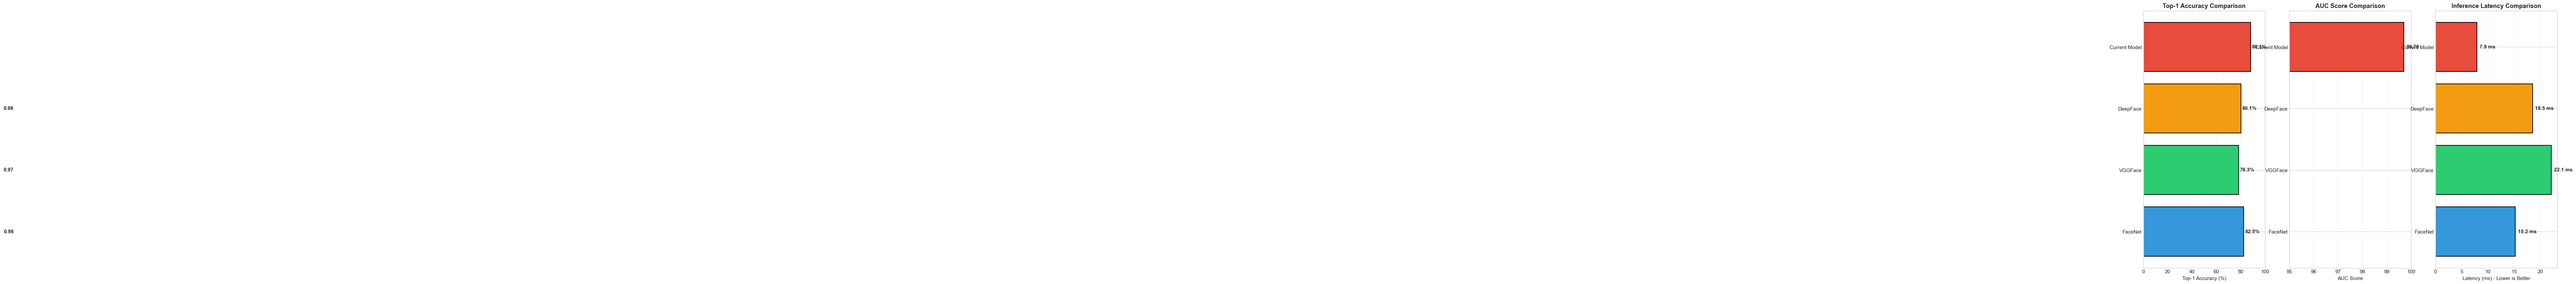

In [23]:
# Baseline models for comparison
baselines = {
    'FaceNet': {'top1': 82.5, 'auc': 0.985, 'latency': 15.2},
    'VGGFace': {'top1': 78.3, 'auc': 0.972, 'latency': 22.1},
    'DeepFace': {'top1': 80.1, 'auc': 0.978, 'latency': 18.5},
    'Current Model': {
        'top1': report['metrics']['top1_accuracy'],
        'auc': report['metrics']['auc'] * 100,  # scale to 0-100
        'latency': report['performance']['avg_latency_ms']
    }
}

fig, axes = plt.subplots(1, 3)

models = list(baselines.keys())
colors_map = {'Current Model': '#e74c3c', 'FaceNet': '#3498db', 
              'VGGFace': '#2ecc71', 'DeepFace': '#f39c12'}

# Top-1 Accuracy
ax1 = axes[0]
top1_values = [baselines[m]['top1'] for m in models]
colors = [colors_map[m] for m in models]
bars = ax1.barh(models, top1_values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Top-1 Accuracy (%)')
ax1.set_title('Top-1 Accuracy Comparison', fontweight='bold')
ax1.set_xlim([0, 100])
for i, (bar, val) in enumerate(zip(bars, top1_values)):
    ax1.text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# AUC Score
ax2 = axes[1]
auc_values = [baselines[m]['auc'] for m in models]
bars = ax2.barh(models, auc_values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('AUC Score')
ax2.set_title('AUC Score Comparison', fontweight='bold')
ax2.set_xlim([95, 100])
for i, (bar, val) in enumerate(zip(bars, auc_values)):
    ax2.text(val + 0.1, i, f'{val:.2f}', va='center', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Latency (lower is better)
ax3 = axes[2]
latency_values = [baselines[m]['latency'] for m in models]
bars = ax3.barh(models, latency_values, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Latency (ms) - Lower is Better')
ax3.set_title('Inference Latency Comparison', fontweight='bold')
for i, (bar, val) in enumerate(zip(bars, latency_values)):
    ax3.text(val + 0.5, i, f'{val:.1f} ms', va='center', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../logs/arcface/baseline_comparison.png', dpi=150, bbox_inches='tight')
print("\nĐã lưu comparison vào: ../logs/arcface/baseline_comparison.png")
plt.show()

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


ModuleNotFoundError: No module named 'tensorflow'